# Final Analysis

# Approach
The first step in our process was to get our data by two different methods: webscraping and API calls

We ran api calls from TMDB and OMDB for a list of over 10,000 movies then used imdb ids to webscrape additional data from Box Office Mojo. We were able to get Title, Year, Genre, IMDB Rating, Score, Director(s), Headline Actors, Release Date, Revenue, and Budget as well as other data which we did not need.

From there we cleaned are data by removing all movies that did not have a budget indicated. After the cleaning process, we retained 4058 solid datapoints. Further analysis was done on movies that were released between 2009 and 2019. 

We then started to answer the following questions through analysis and visualization:

* Do ratings have an impact on Gross Revenue?
* What Actors have "Star Power"?
* How is movie revenue impacted by time?
* What Genres have the highest mean revenue?
* What Genres have the highest mean revenue in the last decade?
* Highest grossing directors in the last decade?
* Highest ROI directors in the last decade?


These questions are important from a business perspective because address whether getting into the market is worth the venture and if the answer is yes, how to navigate that market into producing profitable titles.

Beginning our analysis, we created a new Data Frame to include return on investment statistics for each movie. We then looked at whether a movie's IMDB Rating was correlated with its Gross Revenue. After that we looked movie revenue over time to assess the current trends in film industry. Further analysis was then focused on finding the top 25 Actors and Directors between 2009 and 2019. 



In [2]:
### Import necessary packages ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Prevent pandas from showing values in exponential form ###
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Get Merged and Clean Data

In [3]:
# Data is from merged API calls and webscraping
df = pd.read_csv('mergedData.csv')

In [4]:
# The next few cells we investigate the data
df.head()

,Title,Year,Genre,Rating,Score,Director,Stars,Gross,Popularity,Vote_Count,Id,Original_Language,Original_Title,Genre_Ids,Vote_Average,Release_Date,Revenue,Budget,Genre_y
0,Joker,2019,Crime Drama Thriller,8.500,59.000,Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...",335451311,88.810,12719,475557,en,Joker,"[80, 18, 53]",8.200,2019-10-02,1074.250,55.000,"['Crime', 'Drama', 'Thriller']"
1,Parasite,2019,Comedy Drama Thriller,8.600,96.000,Bong Joon Ho,"Kang-ho Song, Sun-kyun Lee, Yeo-jeong Jo, Woo-...",53369749,92.150,7551,496243,ko,기생충,"[35, 18, 53]",8.500,2019-05-30,245.920,11.360,"['Comedy', 'Drama', 'Thriller']"
2,Avengers: Endgame,2019,Action Adventure Drama,8.400,78.000,"Directors:Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",858373000,39.589,13321,299534,en,Avengers: Endgame,"[12, 878, 28]",8.300,2019-04-24,2797.800,356.000,"['Adventure', 'Science Fiction', 'Action']"
3,1917,2019,Drama War,8.300,78.000,Sam Mendes,"Dean-Charles Chapman, George MacKay, Daniel Ma...",159227644,97.875,5089,530915,en,1917,"[28, 18, 36, 53, 10752]",7.900,2019-12-25,368.030,100.000,"['Action', 'Drama', 'History', 'Thriller', 'War']"
4,Knives Out,2019,Comedy Crime Drama,7.900,82.000,Rian Johnson,"Daniel Craig, Chris Evans, Ana de Armas, Jamie...",165363234,44.214,4124,546554,en,Knives Out,"[35, 80, 18, 9648, 53]",7.800,2019-11-27,308.900,40.000,"['Comedy', 'Crime', 'Drama', 'Mystery', 'Thril..."


In [5]:
df.describe()

,Year,Rating,Score,Gross,Popularity,Vote_Count,Id,Vote_Average,Revenue,Budget
count,4058.000,4058.000,4058.000,4058.000,4058.000,4058.000,4058.000,4058.000,4058.000,4058.000
mean,2002.314,6.552,53.173,56967414.783,15.070,1923.592,85021.004,6.499,116.644,37.463
std,12.396,0.954,21.501,72632220.349,11.074,2759.249,143342.255,0.801,194.718,45.355
min,1927.000,1.900,0.000,273188.000,5.916,16.000,5.000,2.600,0.000,0.000
25%,1995.000,6.000,40.000,14258998.500,10.544,380.500,7860.000,6.000,14.560,6.500
50%,2004.000,6.600,54.000,34623684.500,13.475,879.500,11467.500,6.500,49.020,22.000
75%,2012.000,7.200,68.000,70276905.500,16.874,2216.250,74333.000,7.100,132.817,50.000
max,2020.000,9.300,100.000,858373000.000,522.654,25893.000,620725.000,8.700,2797.800,380.000


In [6]:
df.shape

(4058, 19)

In [7]:
# Create a seperate dataframe to investigate the rate of Return on Investment (ROI)

df_ROI = df.loc[df['Budget'] !=0]
df_ROI['Budget'] = df_ROI['Budget']*1000000 # (We divided the data by 1,000,000 in our scraping process to get managable numbers)


df_ROI['ROI']=df_ROI['Gross']/df_ROI['Budget']
df_ROI = df_ROI.loc[df_ROI['ROI']<=1000]
df_ROI = df_ROI.loc[df_ROI['ROI']>=.01]

In [8]:
df_ROI.head()

,Title,Year,Genre,Rating,Score,Director,Stars,Gross,Popularity,Vote_Count,Id,Original_Language,Original_Title,Genre_Ids,Vote_Average,Release_Date,Revenue,Budget,Genre_y,ROI
0,Joker,2019,Crime Drama Thriller,8.500,59.000,Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...",335451311,88.810,12719,475557,en,Joker,"[80, 18, 53]",8.200,2019-10-02,1074.250,55000000.000,"['Crime', 'Drama', 'Thriller']",6.099
1,Parasite,2019,Comedy Drama Thriller,8.600,96.000,Bong Joon Ho,"Kang-ho Song, Sun-kyun Lee, Yeo-jeong Jo, Woo-...",53369749,92.150,7551,496243,ko,기생충,"[35, 18, 53]",8.500,2019-05-30,245.920,11360000.000,"['Comedy', 'Drama', 'Thriller']",4.698
2,Avengers: Endgame,2019,Action Adventure Drama,8.400,78.000,"Directors:Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",858373000,39.589,13321,299534,en,Avengers: Endgame,"[12, 878, 28]",8.300,2019-04-24,2797.800,356000000.000,"['Adventure', 'Science Fiction', 'Action']",2.411
3,1917,2019,Drama War,8.300,78.000,Sam Mendes,"Dean-Charles Chapman, George MacKay, Daniel Ma...",159227644,97.875,5089,530915,en,1917,"[28, 18, 36, 53, 10752]",7.900,2019-12-25,368.030,100000000.000,"['Action', 'Drama', 'History', 'Thriller', 'War']",1.592
4,Knives Out,2019,Comedy Crime Drama,7.900,82.000,Rian Johnson,"Daniel Craig, Chris Evans, Ana de Armas, Jamie...",165363234,44.214,4124,546554,en,Knives Out,"[35, 80, 18, 9648, 53]",7.800,2019-11-27,308.900,40000000.000,"['Comedy', 'Crime', 'Drama', 'Mystery', 'Thril...",4.134


In [9]:
df_ROI.describe()

,Year,Rating,Score,Gross,Popularity,Vote_Count,Id,Vote_Average,Revenue,Budget,ROI
count,3476.000,3476.000,3476.000,3476.000,3476.000,3476.000,3476.000,3476.000,3476.000,3476.000,3476.000
mean,2002.678,6.560,53.868,63195601.329,15.807,2178.002,81088.370,6.507,133.224,43706944.764,3.072
std,12.279,0.971,20.477,76208777.755,11.738,2900.298,137194.279,0.812,205.342,46131532.335,10.767
min,1927.000,1.900,0.000,292437.000,5.916,41.000,5.000,2.600,0.000,10000.000,0.012
25%,1996.000,6.000,41.000,17496155.500,11.315,500.750,6278.750,6.000,22.765,13000000.000,0.668
50%,2005.000,6.600,54.000,39434283.500,14.153,1081.500,11194.500,6.500,62.810,28000000.000,1.322
75%,2012.000,7.300,68.000,78678597.250,17.570,2569.500,72548.500,7.100,157.180,58200000.000,2.595
max,2020.000,9.300,100.000,858373000.000,522.654,25893.000,620725.000,8.700,2797.800,380000000.000,385.738


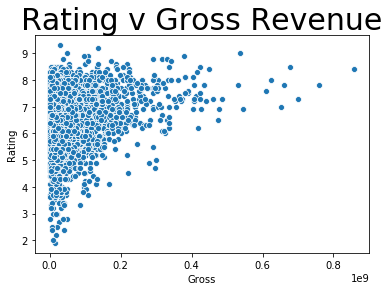

In [12]:
#scatterplot of IMDB Rating and Gross Revenue

ax = sns.scatterplot(x= 'Gross', y = 'Rating', data = df)
df['Gross'].corr(df['Rating'])
ax.set(title = 'Rating v Gross Revenue')
ax.title.set_size(30)

plt.show()




In [12]:
corr = df.corr()
corr

,Year,Rating,Score,Gross,Popularity,Vote_Count,Id,Vote_Average,Revenue,Budget
Year,1.000,-0.167,-0.029,0.093,0.177,0.186,0.613,-0.123,0.175,0.286
Rating,-0.167,1.000,0.625,0.193,0.146,0.375,-0.037,0.941,0.186,0.002
Score,-0.029,0.625,1.000,0.185,0.138,0.284,0.054,0.585,0.162,0.029
Gross,0.093,0.193,0.185,1.000,0.358,0.726,-0.016,0.206,0.929,0.649
Popularity,0.177,0.146,0.138,0.358,1.000,0.442,0.180,0.170,0.383,0.344
Vote_Count,0.186,0.375,0.284,0.726,0.442,1.000,0.054,0.389,0.748,0.561
Id,0.613,-0.037,0.054,-0.016,0.180,0.054,1.000,0.070,0.044,0.015
Vote_Average,-0.123,0.941,0.585,0.206,0.170,0.389,0.070,1.000,0.201,-0.007
Revenue,0.175,0.186,0.162,0.929,0.383,0.748,0.044,0.201,1.000,0.720
Budget,0.286,0.002,0.029,0.649,0.344,0.561,0.015,-0.007,0.720,1.000


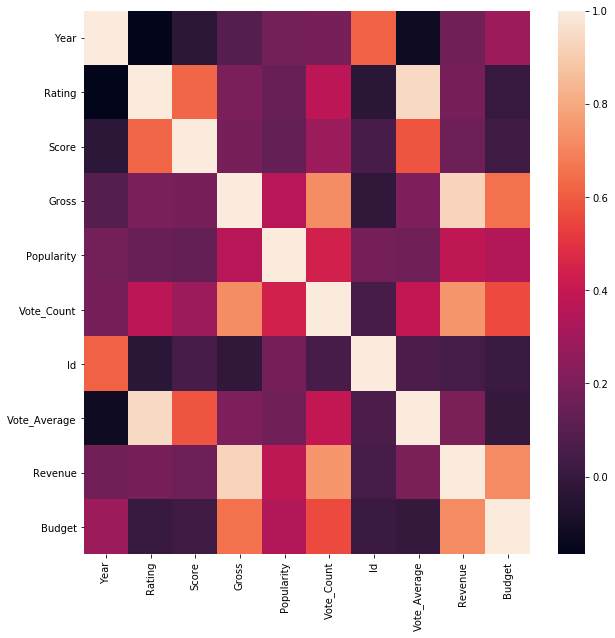

In [13]:
fi = plt.figure(figsize= (10,10))
ax = sns.heatmap(corr)

Not alot of correlation betwen variables here. 

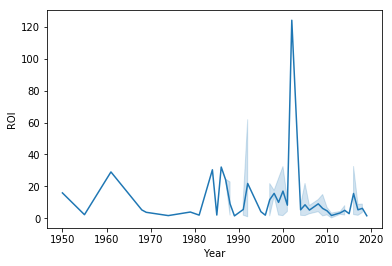

<Figure size 1152x648 with 0 Axes>

In [14]:
yvalues = df_ROI['ROI'].groupby(df['Year']).mean()
sns.lineplot(x = df['Year'], y = yvalues)

fig = plt.figure(figsize = (16, 9))
ax.set(title= 'ROI v Year')
ax.title.set_size(30)
plt.show()


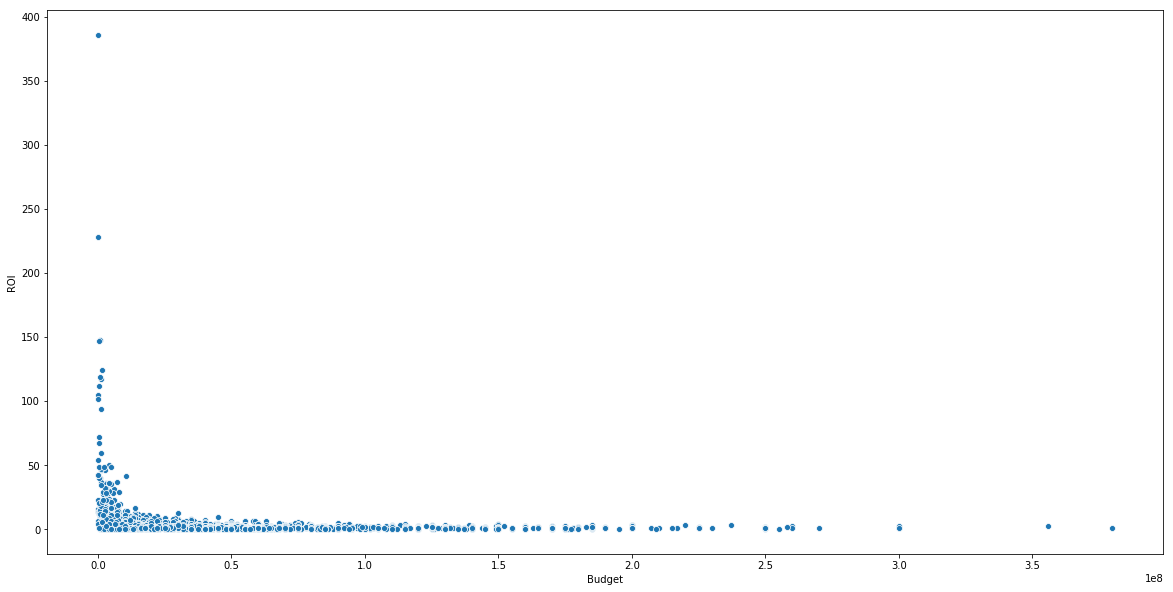

In [20]:
#Scatterplot of Budget vs ROI
fig = plt.figure(figsize = (20,10))

ax = sns.scatterplot('Budget', 'ROI', data = df_ROI)

plt.show()

# Actor Analysis

In [24]:
stars = df['Stars'].str.split(",",n=1,expand = True)
df['Star1']= stars[0]
df['Star2']= stars[1]
stars2 = df['Star2'].str.split(",",n=1,expand = True)
df['Star2']= stars2[0]
df['Star3']= stars2[1]
stars3 = df['Star3'].str.split(",",n=1,expand = True)
df['Star3']= stars2[0]
df['Star4']= stars2[1]

We needed to split the actors column into their own rows.

In [25]:
df1 = df[['Title', 'Gross', 'Star1']].copy()
df2 = df[['Title', 'Gross', 'Star2']].copy()
df3 = df[['Title', 'Gross', 'Star3']].copy()
df4 = df[['Title', 'Gross', 'Star4']].copy()
df1.rename(columns= {'Star1':'Star'}, inplace=True)
df2.rename(columns= {'Star2':'Star'}, inplace=True)
df3.rename(columns= {'Star3':'Star'}, inplace=True)
df4.rename(columns= {'Star4':'Star'}, inplace=True)

In [26]:
frames = [df1,df2,df3,df4]
star_df = pd.concat(frames)

In [27]:
group = star_df.groupby(star_df['Star']).describe()

In [29]:
group.columns = group.columns.droplevel()

In [30]:
group2 = group.loc[group['count']>2]
group1 = group.loc[group['count']>1]

In [32]:
xvalues2 = group2.sort_values('mean',ascending = False)[0:25].index
yvalues2 = group2.sort_values('mean',ascending = False)[0:25]['mean']/1000000

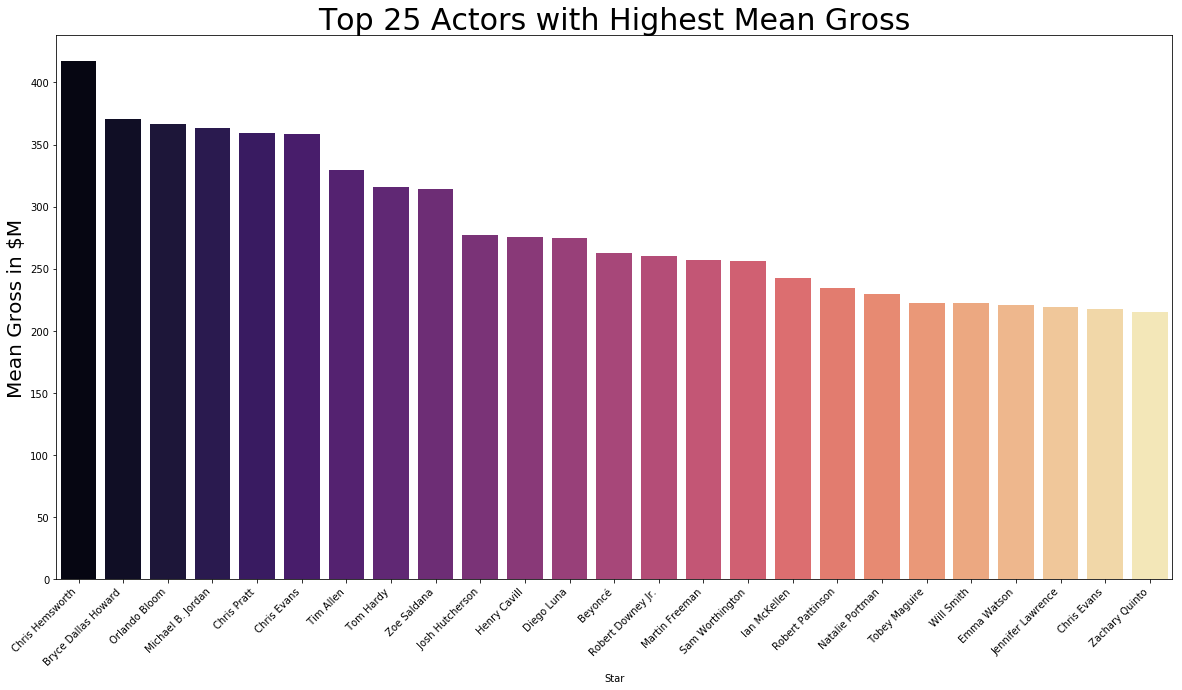

In [34]:
fig = plt.figure(figsize = (20,10))
ax = sns.barplot(xvalues2, yvalues2, palette = 'magma')
ax.set(title = 'Top 25 Actors with Highest Mean Gross')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
ax.set_ylabel("Mean Gross in $M", fontsize =20)
ax.title.set_size(30)
plt.show()

From this chart we can see the Average gross revenue of movies that featured the top actor appearing in two or more movies.
Suggesting that using recognizable a-list actors have a positive impact on movie profitability.

# Return on Investment vs Budget

In [35]:
con = (df.Revenue != 0) & (df.Budget !=0)

temp = df[con]


In [36]:
filter = df[con].groupby('Year')


In [37]:
filter[('Revenue','Budget')].describe()

Revenue                                                           Budget  \
       count    mean     std     min     25%     50%     75%      max   count   
Year                                                                            
1927   1.000   0.650     nan   0.650   0.650   0.650   0.650    0.650   1.000   
1937   1.000 184.930     nan 184.930 184.930 184.930 184.930  184.930   1.000   
1939   2.000 216.965 259.105  33.750 125.358 216.965 308.572  400.180   2.000   
1940   1.000  84.300     nan  84.300  84.300  84.300  84.300   84.300   1.000   
1941   2.000  19.790   4.851  16.360  18.075  19.790  21.505   23.220   2.000   
...      ...     ...     ...     ...     ...     ...     ...      ...     ...   
2016 135.000 178.811 247.971   0.280  23.260  87.550 206.850 1153.300 135.000   
2017 107.000 208.050 259.814   1.600  41.075 113.230 256.725 1238.760 107.000   
2018 118.000 203.984 329.544   2.020  27.795  69.845 265.485 2046.240 118.000   
2019  86.000 255.961 432.049   0.360  33.742 103.530 251.192 2797.800  86.000   
2020  12.000  83.539  93.064  17.500  23.748  41.840 111.552  306.770  12.000   

                                                       
       mean    std   min    25%    50%    75%     max  
Year                                                   
1927  1.300    nan 1.300  1.300  1.300  1.300   1.300  
1937  1.490    nan 1.490  1.490  1.490  1.490   1.490  
1939  3.390  0.863 2.780  3.085  3.390  3.695   4.000  
1940  2.600    nan 2.600  2.600  2.600  2.600   2.600  
1941  1.120  0.396 0.840  0.980  1.120  1.260   1.400  
...     ...    ...   ...    ...    ...    ...     ...  
2016 54.621 58.919 1.500 10.200 31.500 72.500 250.000  
2017 59.470 62.268 0.100 19.000 34.000 82.000 300.000  
2018 53.557 58.325 0.900 14.250 32.000 69.750 300.000  
2019 65.834 67.305 0.050 20.000 40.000 99.400 356.000  
2020 48.167 53.547 5.000  9.750 23.000 81.250 175.000  

[77 rows x 16 columns]

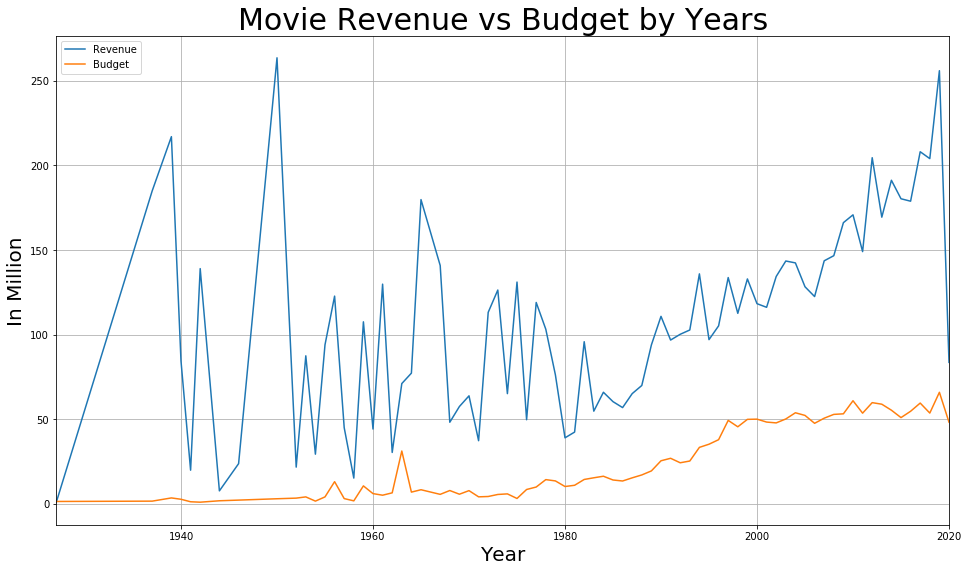

In [40]:
ax = filter[('Revenue', 'Budget')].mean().plot(figsize=(16,9), title= 'Movie Revenue vs Budget by Years', 
                                                grid = True)
ax.set_xlabel('Year', fontsize =20)
ax.set_ylabel('In Million', fontsize = 20)
ax.title.set_size(30)
plt.show()

There is a positive trend in film over the last 20 years. The recent covid 19 pandemic likely has an impact on 2020 performance at the box office. 

# Genre Analysis

In [15]:
def g_split(genre_str):
    '''
          g_split(genre_str) -> str
          splits the genre category
    '''
    
    
    x = genre_str.split(' ')
    if len(x) != 0:
        return x[0]
    else:
        return 'NA'

In [43]:
df['main_genre'] = df.Genre.map(g_split)

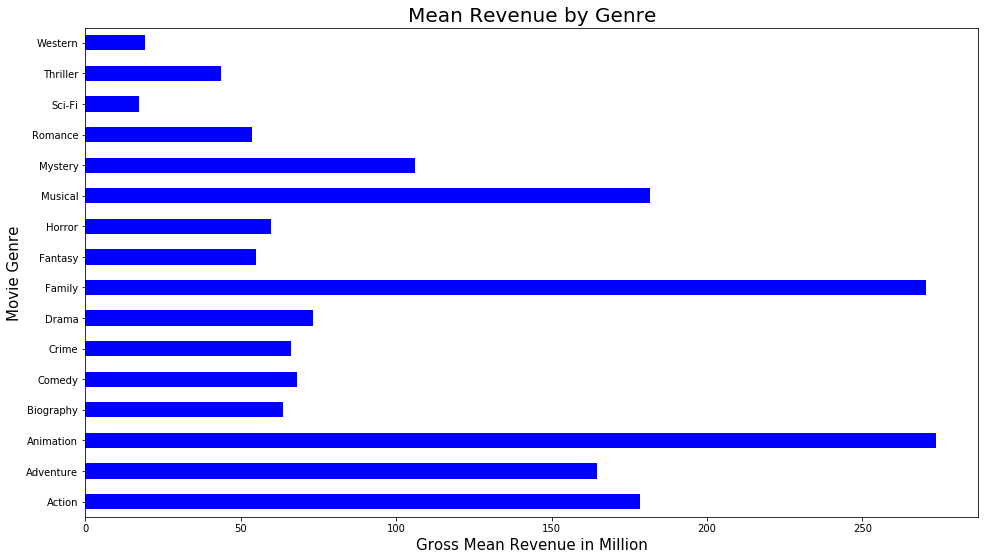

In [45]:
ax = df.groupby('main_genre')['Revenue'].mean().plot(kind='barh',
                                                    figsize = (16,9),
                                                    title='Mean Revenue by Genre',
                                                    color = 'blue'
                                                    )
ax.set_xlabel('Gross Mean Revenue in Million', fontsize =15)
ax.set_ylabel('Movie Genre', fontsize = 15)
ax.title.set_size(20)
plt.show()

In [47]:
df09_19 = df[(pd.DatetimeIndex(df.Release_Date).year >= 2009) & (pd.DatetimeIndex(df.Release_Date).year <=2019)]

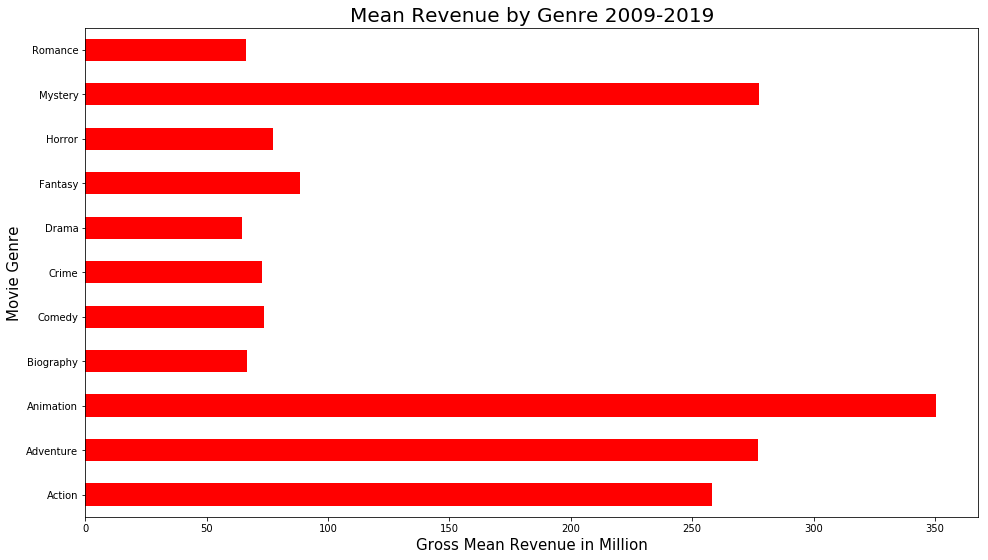

In [51]:
ax = df09_19.groupby('main_genre')['Revenue'].mean().plot(kind='barh',
                                                    figsize = (16,9),
                                                    title='Mean Revenue by Genre 2009-2019',
                                                    color = 'red'
                                                    )
ax.set_xlabel('Gross Mean Revenue in Million', fontsize =15)
ax.set_ylabel('Movie Genre', fontsize = 15)
ax.title.set_size(20)
plt.show()

# Director Analysis

In [60]:
rd = df09_19.groupby('Director')

In [61]:
td= rd.Revenue.mean().sort_values(ascending=False)[0:25]

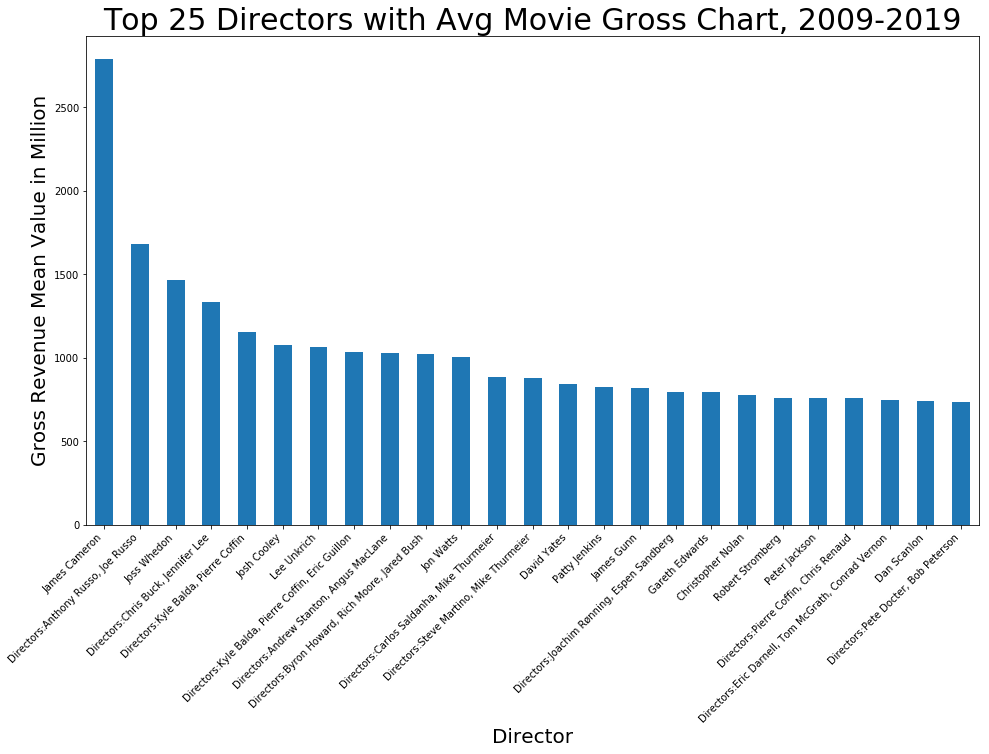

In [64]:
ax = td.plot(kind='bar', figsize= (16,9), title = 'Top 25 Directors with Avg Movie Gross Chart, 2009-2019')
ax.set_xlabel('Director', fontsize= 20)
ax.set_ylabel('Gross Revenue Mean Value in Million', fontsize =20)
ax.title.set_size(30)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

In [66]:
df_ROI09_19 = df_ROI[(pd.DatetimeIndex(df_ROI.Release_Date).year >= 2009) & (pd.DatetimeIndex(df_ROI.Release_Date).year <=2019)]

In [67]:
rdroi = df_ROI09_19.groupby('Director')

In [70]:
tdroi=rdroi.ROI.mean().sort_values(ascending=False)[0:25]

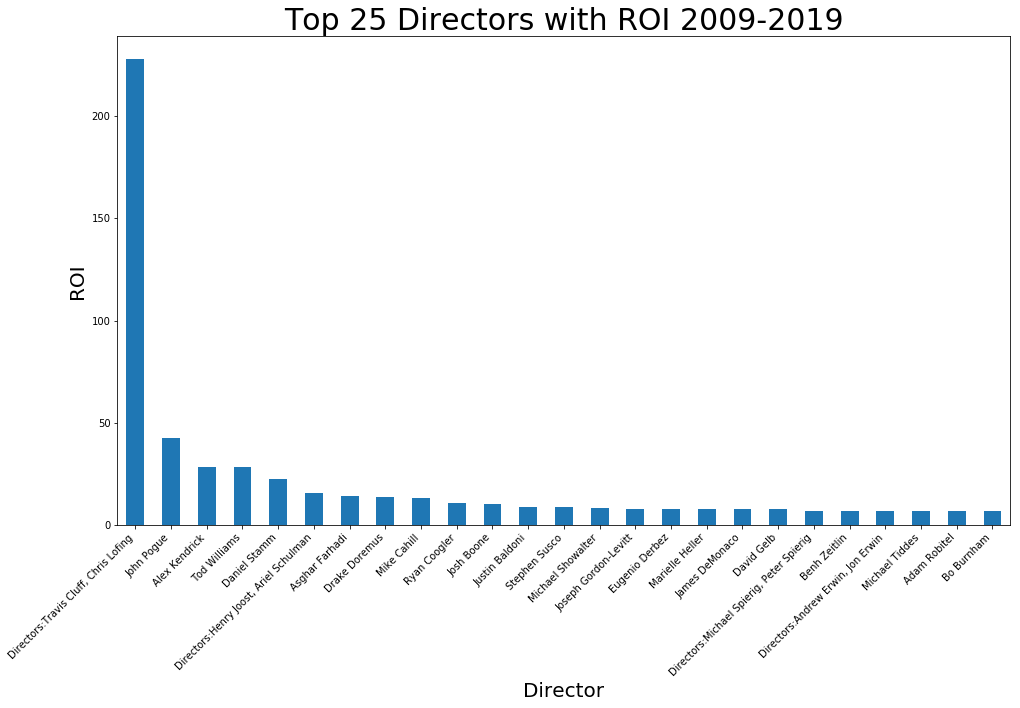

In [71]:
ax = tdroi.plot(kind='bar', figsize= (16,9), title = 'Top 25 Directors with ROI 2009-2019')
ax.set_xlabel('Director', fontsize= 20)
ax.set_ylabel('ROI', fontsize =20)
ax.title.set_size(30)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

# Conclusion
In conclusion, recent pandemic events aside, the film industry has an upward trend over the last two decades. Therefore we recommend that Microsoft proceed with creating a film studio. 

Now what kind of movies should Microsoft make? 

Genre wise, they should focus on making films in the Action and Adventure categories. Historically and recently animation films see high profitability as well but they can be effected by over saturation in this market.

Microsoft should tailor their first movies to directors that have good ROI records or go big budget and hire directors that produce the highest gross revenue. 

Hiriing recognizable actors would potentially increase the liklihood of the films success.